In [1]:
import os
import numpy as np
import pandas as pd

# 指定資料夾路徑
folder_path1 = '../data/Yu_Darvish_FF_videos_4S/features_all_xyz'
folder_path2 = '../data/Yu_Darvish_FS_videos_4S/features_all_xyz'
folder_path3 = '../data/Yu_Darvish_SL_videos_4S/features_all_xyz'
csv1_path = '../data/Downloads/Yu_Darvish_FF_with_videos.csv'
csv2_path = '../data/Downloads/Yu_Darvish_FS_with_videos.csv'
csv3_path = '../data/Downloads/Yu_Darvish_SL_with_videos.csv'
file_number = 200  # 假設每個資料夾有200個檔案

all_features = []
idx = 0
error_idx = []
for folder_path in [folder_path1, folder_path2, folder_path3]:
    for i in range(1, file_number+1):
        file_name = f'pitch_{i:04d}_all_xyz.npy'  # 正確的四位數格式
        try:
            all_features.append(np.load(os.path.join(folder_path, file_name)))
        except Exception as e:
            print(f"檔案 {file_name} 在資料夾 {folder_path} 中不存在或無法讀取。錯誤：{e}")
            error_idx.append(idx)
        idx += 1

# 可選：顯示第一筆資料的形狀來確認內容
print(f"共有 {len(all_features)} 筆資料")
if all_features:
    print("第一筆資料形狀：", all_features[0].shape)
print(f"錯誤索引：{error_idx}")


檔案 pitch_0196_all_xyz.npy 在資料夾 ../data/Yu_Darvish_FS_videos_4S/features_all_xyz 中不存在或無法讀取。錯誤：[Errno 2] No such file or directory: '../data/Yu_Darvish_FS_videos_4S/features_all_xyz\\pitch_0196_all_xyz.npy'
檔案 pitch_0197_all_xyz.npy 在資料夾 ../data/Yu_Darvish_FS_videos_4S/features_all_xyz 中不存在或無法讀取。錯誤：[Errno 2] No such file or directory: '../data/Yu_Darvish_FS_videos_4S/features_all_xyz\\pitch_0197_all_xyz.npy'
檔案 pitch_0198_all_xyz.npy 在資料夾 ../data/Yu_Darvish_FS_videos_4S/features_all_xyz 中不存在或無法讀取。錯誤：[Errno 2] No such file or directory: '../data/Yu_Darvish_FS_videos_4S/features_all_xyz\\pitch_0198_all_xyz.npy'
檔案 pitch_0199_all_xyz.npy 在資料夾 ../data/Yu_Darvish_FS_videos_4S/features_all_xyz 中不存在或無法讀取。錯誤：[Errno 2] No such file or directory: '../data/Yu_Darvish_FS_videos_4S/features_all_xyz\\pitch_0199_all_xyz.npy'
檔案 pitch_0200_all_xyz.npy 在資料夾 ../data/Yu_Darvish_FS_videos_4S/features_all_xyz 中不存在或無法讀取。錯誤：[Errno 2] No such file or directory: '../data/Yu_Darvish_FS_videos_4S/features_all_xyz\

In [2]:
csv_feat = pd.DataFrame()
for csv_path in [csv1_path, csv2_path, csv3_path]:
    csv_feat = pd.concat([csv_feat, pd.read_csv(csv_path).head(200)],ignore_index=True)
csv_feat = csv_feat.drop(index=error_idx)
print(f"csv_feat shape: {csv_feat.shape}")
display(csv_feat.head())

csv_feat shape: (395, 119)


,video_filename,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,pitch_0001.mp4,FF,2022/9/30,91.3,-2.31,5.34,"Darvish, Yu",543281,506433,NaN,...,1.0,1.27,0.37,0.37,38.7,NaN,NaN,NaN,NaN,NaN
1,pitch_0002.mp4,FF,2022/9/30,91.9,-2.02,5.54,"Darvish, Yu",543281,506433,NaN,...,1.0,1.28,0.51,0.51,44.1,NaN,NaN,NaN,NaN,NaN
2,pitch_0003.mp4,FF,2022/9/30,94.2,-2.13,5.39,"Darvish, Yu",656024,506433,field_out,...,2.0,1.09,0.42,0.42,40.3,NaN,NaN,NaN,NaN,NaN
3,pitch_0004.mp4,FF,2022/9/30,93.7,-2.54,5.25,"Darvish, Yu",660162,506433,double,...,1.0,1.19,0.84,-0.84,32.1,NaN,NaN,NaN,NaN,NaN
4,pitch_0005.mp4,FF,2022/9/30,92.3,-2.56,5.26,"Darvish, Yu",657757,506433,NaN,...,1.0,1.22,0.86,-0.86,32.4,NaN,NaN,NaN,NaN,NaN


# 定義X,y

In [3]:
import numpy as np

def pad_to_length(data, target_length=300):
    """
    data: numpy array shape (frames, joints, coords)
    target_length: int, 補齊到的長度
    
    如果 data 長度小於 target_length，用零補齊；
    如果長度大於 target_length，直接截斷。
    """
    frames, joints, coords = data.shape
    if frames >= target_length:
        return data[:target_length]  # 截斷
    else:
        # 補零
        padding = np.zeros((target_length - frames, joints, coords), dtype=data.dtype)
        return np.concatenate((data, padding), axis=0)
padded_all_features = [pad_to_length(arr, target_length=300) for arr in all_features]
padded_all_features = np.array(padded_all_features)
print(padded_all_features.shape)

(395, 300, 33, 3)


In [4]:
joint_names_zh = [
    "鼻子", "左眼內側", "左眼", "左眼外側", "右眼內側", "右眼", "右眼外側",
    "左耳", "右耳", "嘴巴左側", "嘴巴右側",
    "左肩", "右肩", "左手肘", "右手肘", "左手腕", "右手腕",
    "左手小指", "右手小指", "左手大拇指", "右手大拇指", "左手食指", "右手食指", "左手中指", "右手中指",
    "左臀", "右臀", "左膝", "右膝", "左腳踝", "右腳踝", "左腳跟", "右腳跟", "左腳尖", "右腳尖"
][:33]  # 確保只有33個


c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


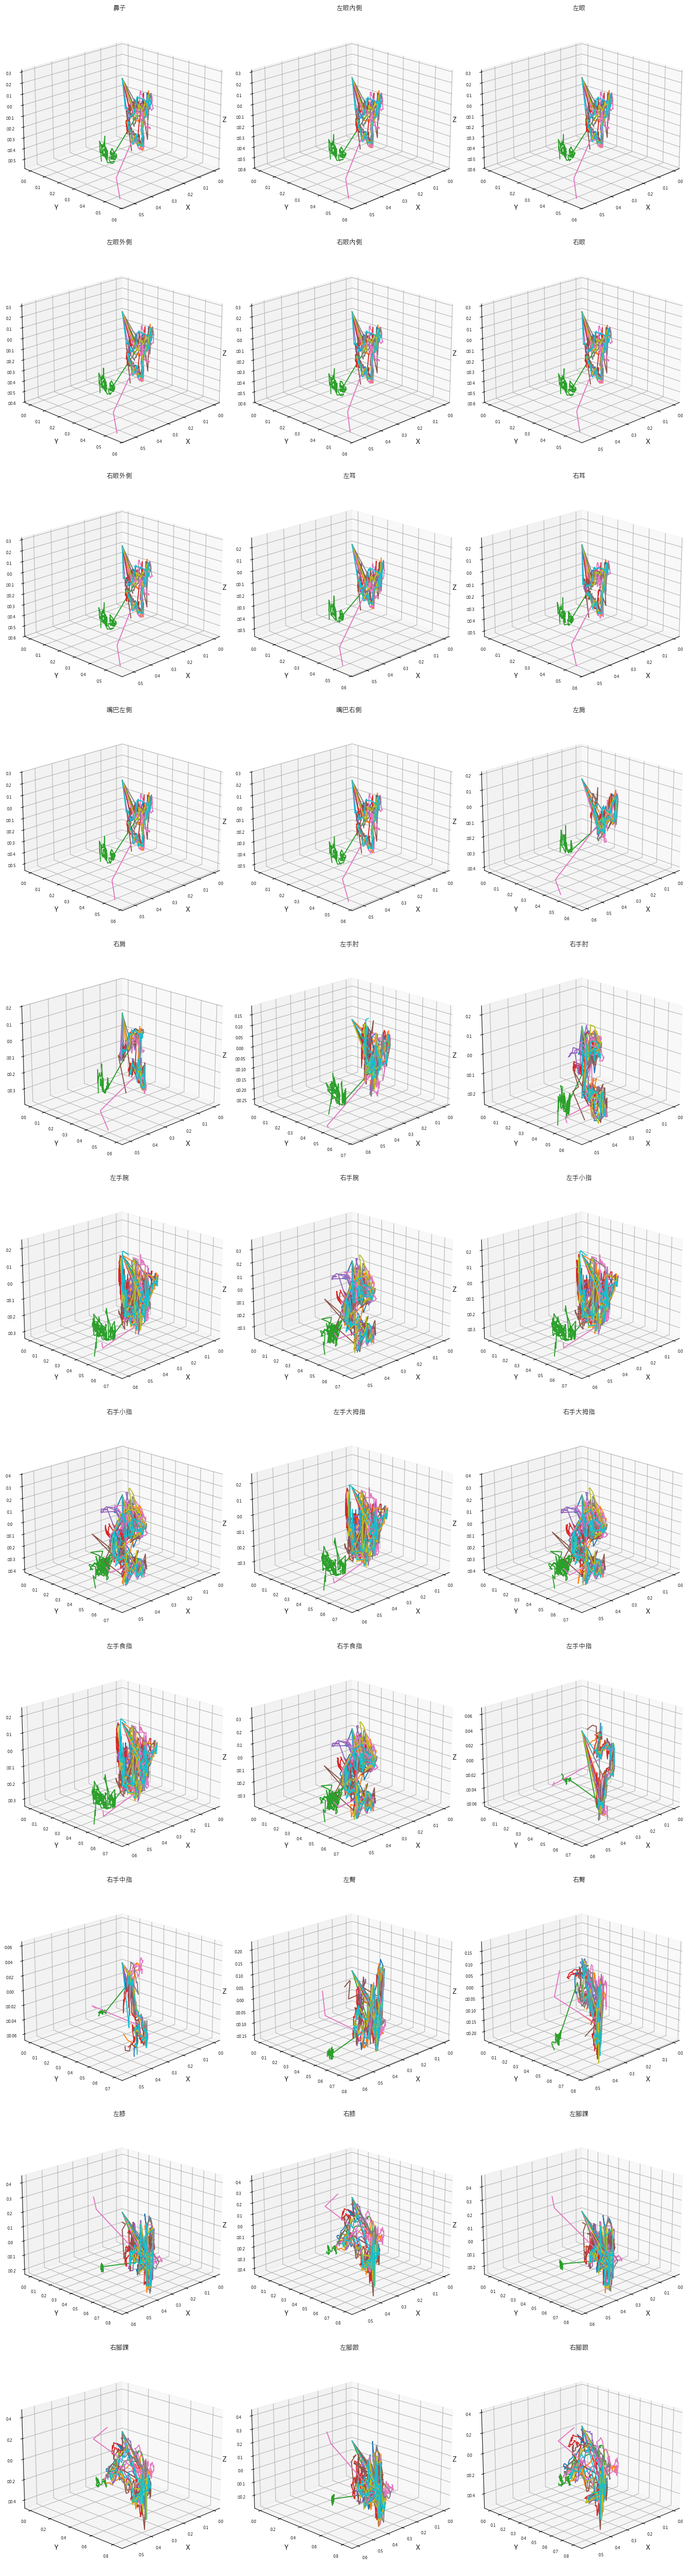

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')

# 假設 all_data 是 list，每個元素 shape = (T, 33, 3)
# 假設 joint_names_zh 是長度 33 的關節中文名稱 list

fig = plt.figure(figsize=(15, 55))  # 根據行數調整高度，11排 * 5高度
cols = 3
rows = 11

for i in range(33):
    ax = fig.add_subplot(rows, cols, i + 1, projection='3d')
    
    for data in padded_all_features[:10]:    
        x = data[:, i, 0]
        y = data[:, i, 1]
        z = data[:, i, 2]
        ax.plot(x, y, z)

    ax.set_title(f'{joint_names_zh[i]}', fontsize=10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=20, azim=45)  # 可根據需要調整視角
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()


# 萃取出x

In [18]:
from sklearn.preprocessing import StandardScaler

X_reshaped = padded_all_features.reshape(-1, 33*3)  # (395*300, 99)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)  # (395*300, 99)

# 還原回原本 shape
X_scaled_4d = X_scaled.reshape(395, 300, 33, 3)

print(X_scaled_4d.shape)
X_for_knn = X_scaled_4d.reshape(395, 300, 99)
print(X_for_knn.shape)

(395, 300, 33, 3)
(395, 300, 99)


# 萃取出Y

In [19]:
from sklearn.preprocessing import LabelEncoder

y_raw = csv_feat['description'].values  # 轉成 numpy array 比較好操作

# 建立 LabelEncoder
le = LabelEncoder()

# 對 y 進行標籤編碼
y = le.fit_transform(y_raw)

print("原始文字標籤範例:", y_raw[:5])
print("編碼後數字標籤範例:", y[:5])
print("標籤類別數量:", len(le.classes_))
print(y.shape)


原始文字標籤範例: ['ball' 'ball' 'hit_into_play' 'hit_into_play' 'foul']
編碼後數字標籤範例: [0 0 7 7 3]
標籤類別數量: 10
(395,)


In [20]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_for_knn, y, test_size=0.2, random_state=42)

# 4. 建模型 (KNN + DTW)
knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
knn_dtw.fit(X_train, y_train)

# 5. 預測
y_pred = knn_dtw.predict(X_test)


c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.77      0.50        22
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.28      0.29      0.29        17
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.50      0.13      0.21        15
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         1

    accuracy                           0.30        79
   macro avg       0.11      0.12      0.10        79
weighted avg       0.26      0.30      0.24        79



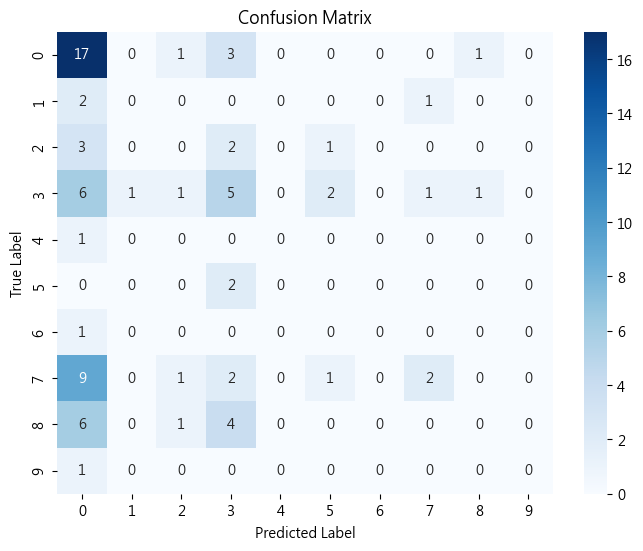

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 假設你已經有 y_test 和 y_pred

# 1. 混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 2. 分類報告 (包含 precision, recall, f1-score)
report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

# 3. 畫混淆矩陣熱力圖
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# 與隨機亂猜比較

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.05      0.07        22
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.20      0.18      0.19        17
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         1

    accuracy                           0.05        79
   macro avg       0.03      0.02      0.03        79
weighted avg       0.08      0.05      0.06        79



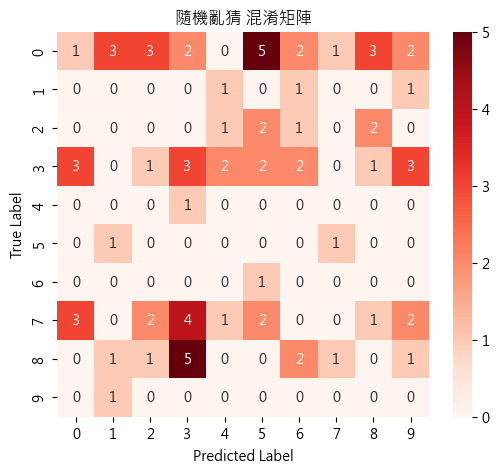

In [23]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 確保使用相同的類別分佈
labels = np.unique(y_test)

# 隨機亂猜（均勻亂數選擇類別）
y_pred_random = np.random.choice(labels, size=len(y_test))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()
report = classification_report(y_test, y_pred_random)
print("Classification Report:\n", report)
plot_confusion_matrix(y_test, y_pred_random, "隨機亂猜 混淆矩陣")


# 雙層系統 針對高ReCALL再設計高準確度系統

In [36]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((316, 300, 99), (79, 300, 99), (316,), (79,))

In [37]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class TwoStageClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, stage1_model, stage2_model, target_class=0):
        self.stage1_model = stage1_model
        self.stage2_model = stage2_model
        self.target_class = target_class
    
    def fit(self, X, y):
        # Step 1: 訓練第一階段模型（全體資料）
        self.stage1_model.fit(X, y)

        # Step 2: 從第一階段預測中挑出被預測為 target_class 的樣本
        y_pred1 = self.stage1_model.predict(X)
        mask = (y_pred1 == self.target_class)

        # 只在這些樣本上訓練第二階段
        X_stage2 = X[mask]
        y_stage2 = y[mask]

        self.stage2_model.fit(X_stage2.reshape(X_stage2.shape[0],-1), y_stage2)
        return self

    def predict(self, X):
        # Step 1: 第一階段預測
        y_pred1 = self.stage1_model.predict(X)

        # Step 2: 找出預測為 target_class 的樣本，進行第二階段預測
        mask = (y_pred1 == self.target_class)
        X_stage2 = X[mask]

        # 使用第二階段模型重新預測
        if len(X_stage2) > 0:
            y_pred2 = self.stage2_model.predict(X_stage2.reshape(X_stage2.shape[0],-1))
            y_pred_final = np.copy(y_pred1)
            y_pred_final[mask] = y_pred2
        else:
            y_pred_final = y_pred1

        return y_pred_final


In [38]:
from sklearn.ensemble import RandomForestClassifier

# 假設 X_train 的 shape 是 (樣本數, 特徵數)
stage1 = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
stage2 = RandomForestClassifier(n_estimators=100)

model = TwoStageClassifier(stage1_model=stage1, stage2_model=stage2, target_class=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ricky\miniconda3\envs\pitch_pose_tcn\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.77      0.52        22
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.26      0.29      0.28        17
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.33      0.13      0.19        15
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         1

    accuracy                           0.30        79
   macro avg       0.10      0.12      0.10        79
weighted avg       0.23      0.30      0.24        79

accuracy 0.3037974683544304


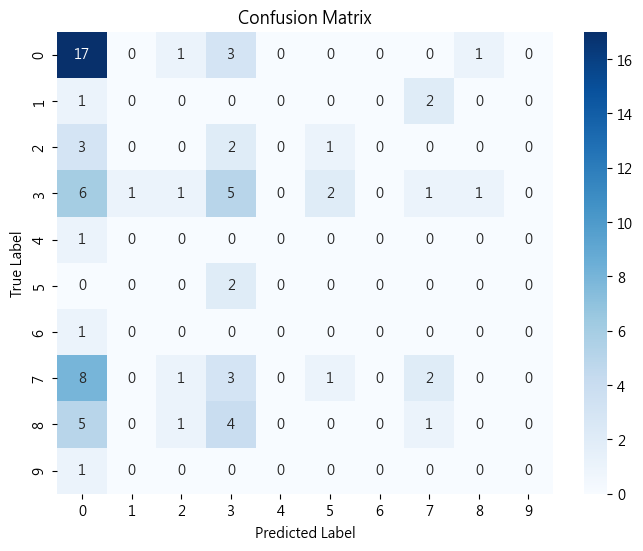

In [40]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 假設你已經有 y_test 和 y_pred

# 1. 混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 2. 分類報告 (包含 precision, recall, f1-score)
report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)
print("accuracy",accuracy_score(y_test,y_pred))

# 3. 畫混淆矩陣熱力圖
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
